# Introduction to Machine Learning for the Built Environment - Supervised Classification Models

- Created by Clayton Miller - clayton@nus.edu.sg - miller.clayton@gmail.com

This notebook is an introduction to the machine learning concepts of classification. We will use the ASHRAE Thermal Comfort Database II data set to predict what makes a person feel comfortable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

## Load the IEQ Data and find a classification objective

We can constrain the data to be able to predict a certain attribute

In [3]:
ieq_data = pd.read_csv("../input/ashrae-global-thermal-comfort-database-ii/ashrae_db2.01.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ieq_data.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


In [5]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            105928 non-null  object 
 1   Data contributor                                  107583 non-null  object 
 2   Year                                              107335 non-null  float64
 3   Season                                            107342 non-null  object 
 4   Koppen climate classification                     107583 non-null  object 
 5   Climate                                           107583 non-null  object 
 6   City                                              107570 non-null  object 
 7   Country                                           107583 non-null  object 
 8   Building type                                     103384 non-null  object 
 9   Cool

In [6]:
ieq_data["ThermalSensation_rounded"] =ieq_data["Thermal sensation"].round()

In [7]:
ieq_data["ThermalSensation_rounded"].value_counts()

-0.0    44063
 1.0    20086
-1.0    16753
 2.0    10542
-2.0     6349
 3.0     4311
-3.0     2350
Name: ThermalSensation_rounded, dtype: int64

## Classification Objective -- Predict Thermal Sensation using a Random Forest Model

Let's use many of the other variables to predict thermal sensation as classification objective.

To do this we can use the Random Forest Classification Model. This model is a good all-purpose model that is able to ingest input features of various types. It is a form of a [decision-tree model](https://en.wikipedia.org/wiki/Decision_tree_learning).


## Creating Feature and Target Data Sets
The first thing we need to do is create the the feature data set and the target variable.

In [8]:
ieq_data.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database,ThermalSensation_rounded
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2,-0.0
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2,-2.0
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2,0.0
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2,-2.0
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2,-0.0


In [9]:
list(ieq_data.columns)

['Publication (Citation)',
 'Data contributor',
 'Year',
 'Season',
 'Koppen climate classification',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Cooling startegy_operation mode for MM buildings',
 'Heating strategy_building level',
 'Age',
 'Sex',
 'Thermal sensation',
 'Thermal sensation acceptability',
 'Thermal preference',
 'Air movement acceptability',
 'Air movement preference',
 'Thermal comfort',
 'PMV',
 'PPD',
 'SET',
 'Clo',
 'Met',
 'activity_10',
 'activity_20',
 'activity_30',
 'activity_60',
 'Air temperature (C)',
 'Air temperature (F)',
 'Ta_h (C)',
 'Ta_h (F)',
 'Ta_m (C)',
 'Ta_m (F)',
 'Ta_l (C)',
 'Ta_l (F)',
 'Operative temperature (C)',
 'Operative temperature (F)',
 'Radiant temperature (C)',
 'Radiant temperature (F)',
 'Globe temperature (C)',
 'Globe temperature (F)',
 'Tg_h (C)',
 'Tg_h (F)',
 'Tg_m (C)',
 'Tg_m (F)',
 'Tg_l (C)',
 'Tg_l (F)',
 'Relative humidity (%)',
 'Humidity preference',
 'Humidity sensation

Let's use the following columns as input features for the classification model. These features will be used by the model to try to predict `ThermalSensation_rounded`.

Several of the features are related to the building context (i.e.: `Country`, `City`), the environmental conditions (i.e.: `Air Temperature (C)`, `Relative humidity (%)`) and personal factors (i.e.: `Sex`, `Clo`, etc.)


In [10]:
feature_columns = [
 'Year',
 'Season',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Sex',
 'Clo',
 'Met',
 'Air temperature (C)',
 'Relative humidity (%)',
 'Air velocity (m/s)','ThermalSensation_rounded']

In [11]:
features_ = ieq_data[feature_columns]

In [12]:
features_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             107335 non-null  float64
 1   Season                           107342 non-null  object 
 2   Climate                          107583 non-null  object 
 3   City                             107570 non-null  object 
 4   Country                          107583 non-null  object 
 5   Building type                    103384 non-null  object 
 6   Cooling startegy_building level  106356 non-null  object 
 7   Sex                              67035 non-null   object 
 8   Clo                              99663 non-null   float64
 9   Met                              90419 non-null   float64
 10  Air temperature (C)              99911 non-null   float64
 11  Relative humidity (%)            97762 non-null   float64
 12  Ai

In [13]:
 A = features_.dropna()

In [14]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43835 entries, 2233 to 104033
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             43835 non-null  float64
 1   Season                           43835 non-null  object 
 2   Climate                          43835 non-null  object 
 3   City                             43835 non-null  object 
 4   Country                          43835 non-null  object 
 5   Building type                    43835 non-null  object 
 6   Cooling startegy_building level  43835 non-null  object 
 7   Sex                              43835 non-null  object 
 8   Clo                              43835 non-null  float64
 9   Met                              43835 non-null  float64
 10  Air temperature (C)              43835 non-null  float64
 11  Relative humidity (%)            43835 non-null  float64
 12  Air velocity (

In [15]:
features = A.drop(['ThermalSensation_rounded'],axis=1)

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43835 entries, 2233 to 104033
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             43835 non-null  float64
 1   Season                           43835 non-null  object 
 2   Climate                          43835 non-null  object 
 3   City                             43835 non-null  object 
 4   Country                          43835 non-null  object 
 5   Building type                    43835 non-null  object 
 6   Cooling startegy_building level  43835 non-null  object 
 7   Sex                              43835 non-null  object 
 8   Clo                              43835 non-null  float64
 9   Met                              43835 non-null  float64
 10  Air temperature (C)              43835 non-null  float64
 11  Relative humidity (%)            43835 non-null  float64
 12  Air velocity (

The **target** variable is the column that we want to predict - in this case, thermal sensation. We will use the "rounded" version to minimize the number of categories

In [17]:
target = A["ThermalSensation_rounded"]

In [18]:
target.head()

2233   -2.0
2234   -1.0
2235   -2.0
2236   -2.0
2237    0.0
Name: ThermalSensation_rounded, dtype: float64

## Create dummy variables for the categories

Once again, we need to convert the categorical variables to dummy variables in order as that is the input the model expects

In [19]:
features_withdummies = pd.get_dummies(features)

In [20]:
features_withdummies.head()

,Year,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,...,Building type_Multifamily housing,Building type_Office,Building type_Others,Building type_Senior center,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
2233,2012.0,0.75,1.0,25.2,64.0,0.1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2234,2012.0,0.64,1.0,25.2,64.0,0.1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2235,2012.0,0.64,1.0,25.2,64.0,0.1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2236,2012.0,0.75,1.0,25.2,64.0,0.1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2237,2012.0,0.72,1.0,25.2,64.0,0.1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [21]:
features_withdummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43835 entries, 2233 to 104033
Columns: 103 entries, Year to Sex_Male
dtypes: float64(6), uint8(97)
memory usage: 6.4 MB


## Create the Train and Test Split using SK Learn

Now we will create a function that will divide the data set into a random train/test combination.

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features_withdummies, target, test_size=0.3, random_state=2)


In [23]:
features_train.head()

,Year,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,...,Building type_Multifamily housing,Building type_Office,Building type_Others,Building type_Senior center,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
49943,1998.0,0.73,1.00,25.3,38.8,0.10,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
55061,2010.0,0.46,1.00,25.1,67.5,0.10,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
86643,1982.0,0.46,1.11,23.8,58.2,0.08,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
87984,1983.0,0.86,1.06,21.3,37.2,0.12,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
53396,1999.0,0.73,1.20,22.8,30.8,0.04,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [24]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30684 entries, 49943 to 67471
Columns: 103 entries, Year to Sex_Male
dtypes: float64(6), uint8(97)
memory usage: 4.5 MB


In [25]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13151 entries, 59007 to 103504
Columns: 103 entries, Year to Sex_Male
dtypes: float64(6), uint8(97)
memory usage: 1.9 MB


## Train the Random Forest Model and make the classification prediction

We now can call the Random Forest model from sklearn that was loaded before and specify various input features (or parameters) that influence the way the model is constructed.

These parameters can be optimized in order to achieve the best accuracy.

In [26]:
model_rf = RandomForestClassifier(oob_score = True, max_features = 'auto', n_estimators = 100, min_samples_leaf = 2, random_state = 2)

In [27]:
model_rf.fit(features_train, target_train)


RandomForestClassifier(min_samples_leaf=2, oob_score=True, random_state=2)

## Out-of-Bag (OOB) Error Calculation

OOB is a metric to measure the accuracy of the classification to predict the right class. The fact that we have six classes to predict makes this classification a bit of challenge.


In [28]:
mean_model_accuracy = model_rf.oob_score_

print("Model accuracy: "+str(mean_model_accuracy))

Model accuracy: 0.48445443879546346


The model is accurate about half the time in predicting if someone is comfortable. That seems low, but let's find where the baseline is.

## Create a Baseline Model to compare the accuracy of the model

Sci-kit learn allows you to create a baseline which is the accuracy in just random guessing



In [29]:
#Dummy Classifier model to get a baseline
baseline_rf = DummyClassifier(strategy='stratified',random_state=0)
baseline_rf.fit(features_train, target_train)
#DummyClassifier(constant=None, random_state=1, strategy='most_frequent')
baseline_model_accuracy = baseline_rf.score(features_test, target_test)
print("Model accuracy: "+str(baseline_model_accuracy))

Model accuracy: 0.2892555699186374


The baseline model is only 28%, therefore our model is almost twice the accuracy at predicting the right value

## Classification Report

Classification is often evaluated by more than just accuracy -- there are several other metrics that are calculated to understand the success to classification. We can report that outlines the `precision`, `recall`, `f1-score`, and `support` metrics for each of the classes being predicted.

In [30]:
y_pred = model_rf.predict(features_test)
y_true = np.array(target_test)
categories = np.array(target.sort_values().unique())
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        -3.0       0.43      0.02      0.04       139
        -2.0       0.31      0.09      0.14       767
        -1.0       0.39      0.30      0.34      2267
         0.0       0.55      0.79      0.64      5894
         1.0       0.40      0.28      0.33      2565
         2.0       0.40      0.25      0.31      1110
         3.0       0.47      0.18      0.26       409

    accuracy                           0.49     13151
   macro avg       0.42      0.27      0.29     13151
weighted avg       0.46      0.49      0.45     13151



## Feature Importance

With Random Forest models, there is the built-in capability to calculate the **Feature Importance**. This value is calculated based on which features most contribute to accurate predictions.



In [31]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [32]:
# Print the feature ranking
print("Feature ranking:")

for f in range(features_withdummies.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features_withdummies.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Air temperature (C) (0.225219)
2. feature Relative humidity (%) (0.193355)
3. feature Air velocity (m/s) (0.153468)
4. feature Clo (0.148473)
5. feature Met (0.070944)
6. feature Year (0.019220)
7. feature Sex_Male (0.016218)
8. feature Sex_Female (0.015844)
9. feature Season_Summer (0.011031)
10. feature Season_Winter (0.009665)
11. feature Season_Spring (0.007771)
12. feature Season_Autumn (0.007020)
13. feature Cooling startegy_building level_Naturally Ventilated (0.006689)
14. feature Cooling startegy_building level_Air Conditioned (0.006674)
15. feature Cooling startegy_building level_Mixed Mode (0.006152)
16. feature Climate_Tropical wet savanna (0.005564)
17. feature Country_India (0.004361)
18. feature Building type_Office (0.004321)
19. feature Climate_Hot semi-arid (0.004076)
20. feature Climate_Subtropical highland (0.003571)
21. feature City_Chennai (0.003335)
22. feature City_Shimla (0.002948)
23. feature Country_UK (0.002547)
24. feature Buildi

According to the feature importance analysis, it seems that the conventional environmental metrics are the best predictors of comfort followed by the personal factors

## Plot Feature Importance

We can also plot the feature importance in a line chart of the top features to get a better visual sense

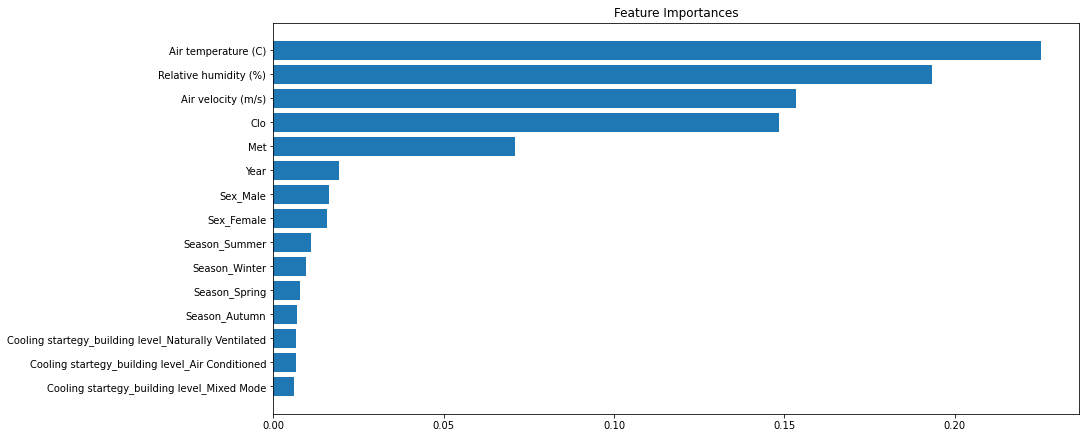

In [33]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature Importances")
plt.barh(range(15), importances[indices][:15], align="center")
plt.yticks(range(15), features_withdummies.columns[indices][:15])#
plt.gca().invert_yaxis()
plt.tight_layout(pad=0.4)
plt.show()


## Classification Confusion Matrix Visualization

A confusion matrix is a visualization that helps a user understand which classes are being misclassified 

In this case we will look at absolute numbers of misclassifications and a normalized version of misclassification.

In [34]:
def plot_confusion_matrix(cm, categories, title='Confusion matrix', cmap='Reds'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks,categories, rotation=90)
    plt.yticks(tick_marks,categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[   3   11   42   67    8    4    4]
 [   2   69  207  420   55   11    3]
 [   1   63  688 1337  154   24    0]
 [   1   46  554 4641  524  109   19]
 [   0   18  167 1478  715  161   26]
 [   0   11   66  448  277  276   32]
 [   0    5   36  118   71  104   75]]


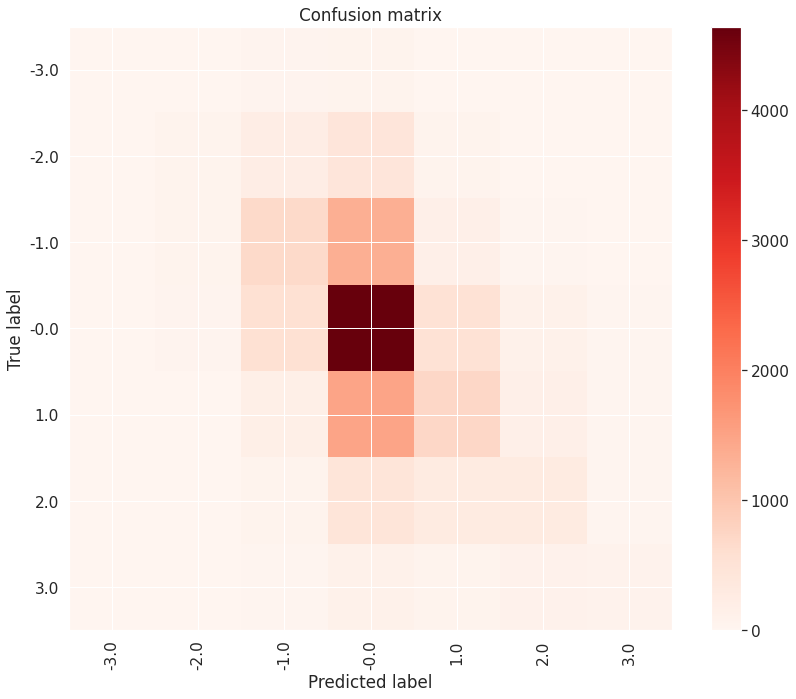

In [35]:
# Compute confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
sns.set(font_scale=1.4)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm, categories)

Normalized confusion matrix
[[2.16e-02 7.91e-02 3.02e-01 4.82e-01 5.76e-02 2.88e-02 2.88e-02]
 [2.61e-03 9.00e-02 2.70e-01 5.48e-01 7.17e-02 1.43e-02 3.91e-03]
 [4.41e-04 2.78e-02 3.03e-01 5.90e-01 6.79e-02 1.06e-02 0.00e+00]
 [1.70e-04 7.80e-03 9.40e-02 7.87e-01 8.89e-02 1.85e-02 3.22e-03]
 [0.00e+00 7.02e-03 6.51e-02 5.76e-01 2.79e-01 6.28e-02 1.01e-02]
 [0.00e+00 9.91e-03 5.95e-02 4.04e-01 2.50e-01 2.49e-01 2.88e-02]
 [0.00e+00 1.22e-02 8.80e-02 2.89e-01 1.74e-01 2.54e-01 1.83e-01]]


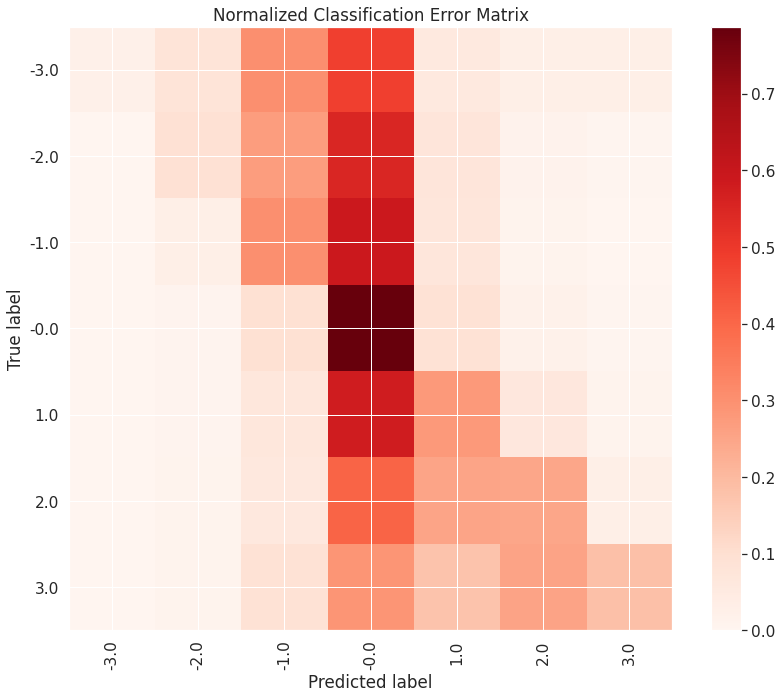

In [36]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm_normalized, categories, title='Normalized Classification Error Matrix')
plt.show()